#Conduct analysis on your client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline


In [2]:
retail_df = pd.read_csv(r"E:\My Python codes\QVI_transaction_data.csv")
retail_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,10/17/2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,5/14/2019,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,5/20/2019,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,8/17/2018,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,8/18/2018,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,3/9/2019,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,8/13/2018,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,11/6/2018,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,12/27/2018,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [3]:
retail_df.info()
#No Null values but the date column is in string format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  object 
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.2+ MB


In [4]:
retail_df.drop_duplicates(keep=False,inplace=True) 

In [5]:
#Convert Date column to datetime format
retail_df.loc[:,'DATE'] = pd.to_datetime(retail_df.loc[:,'DATE'], format= '%m/%d/%Y')

retail_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [6]:
#Let's check if there's anything other than chips
retail_df['PROD_NAME'].unique()
#Looks like the list also includes salsa sauces. From the Summary below we can see that salsa dips are 300g in weight. 
#We'll filter and remove these

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [7]:
retail_df1 = retail_df.loc[~(retail_df['PROD_NAME']).str.contains('300g') == True].sort_values('DATE')
retail_df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
256685,2018-07-01,245,245339,247845,7,Smiths Crinkle Original 330g,2,11.4
235990,2018-07-01,222,222040,221737,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
34341,2018-07-01,25,25040,21704,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6
62583,2018-07-01,128,128215,132006,29,French Fries Potato Chips 175g,2,6.0
116435,2018-07-01,256,256330,255496,52,Grain Waves Sour Cream&Chives 210G,1,3.6
...,...,...,...,...,...,...,...,...
111308,2019-06-30,172,172209,174057,2,Cobs Popd Sour Crm &Chives Chips 110g,2,7.6
31603,2019-06-30,199,199320,198993,24,Grain Waves Sweet Chilli 210g,2,7.2
245890,2019-06-30,95,95300,95463,23,Cheezels Cheese 330g,2,11.4
245590,2019-06-30,91,91076,89519,40,Thins Chips Seasonedchicken 175g,2,6.6


I want to do a trend analysis of sales for the two years, over different intervals (Sales per day, Sales per week, sales per month, and sales per quarter

In [8]:
#Include another column for quarterly period
retail_df1['QTR']=pd.PeriodIndex(retail_df1['DATE'], freq='Q')
retail_df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,QTR
256685,2018-07-01,245,245339,247845,7,Smiths Crinkle Original 330g,2,11.4,2018Q3
235990,2018-07-01,222,222040,221737,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018Q3
34341,2018-07-01,25,25040,21704,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6,2018Q3
62583,2018-07-01,128,128215,132006,29,French Fries Potato Chips 175g,2,6.0,2018Q3
116435,2018-07-01,256,256330,255496,52,Grain Waves Sour Cream&Chives 210G,1,3.6,2018Q3
...,...,...,...,...,...,...,...,...,...
111308,2019-06-30,172,172209,174057,2,Cobs Popd Sour Crm &Chives Chips 110g,2,7.6,2019Q2
31603,2019-06-30,199,199320,198993,24,Grain Waves Sweet Chilli 210g,2,7.2,2019Q2
245890,2019-06-30,95,95300,95463,23,Cheezels Cheese 330g,2,11.4,2019Q2
245590,2019-06-30,91,91076,89519,40,Thins Chips Seasonedchicken 175g,2,6.6,2019Q2


In [9]:
retail_df1['QTR'].unique()

<PeriodArray>
['2018Q3', '2018Q4', '2019Q1', '2019Q2']
Length: 4, dtype: period[Q-DEC]

In [10]:
retail_df1 = retail_df1[['DATE','QTR','STORE_NBR','LYLTY_CARD_NBR','TXN_ID','PROD_NBR','PROD_NAME','PROD_QTY','TOT_SALES']]
retail_df1

,DATE,QTR,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
256685,2018-07-01,2018Q3,245,245339,247845,7,Smiths Crinkle Original 330g,2,11.4
235990,2018-07-01,2018Q3,222,222040,221737,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
34341,2018-07-01,2018Q3,25,25040,21704,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6
62583,2018-07-01,2018Q3,128,128215,132006,29,French Fries Potato Chips 175g,2,6.0
116435,2018-07-01,2018Q3,256,256330,255496,52,Grain Waves Sour Cream&Chives 210G,1,3.6
...,...,...,...,...,...,...,...,...,...
111308,2019-06-30,2019Q2,172,172209,174057,2,Cobs Popd Sour Crm &Chives Chips 110g,2,7.6
31603,2019-06-30,2019Q2,199,199320,198993,24,Grain Waves Sweet Chilli 210g,2,7.2
245890,2019-06-30,2019Q2,95,95300,95463,23,Cheezels Cheese 330g,2,11.4
245590,2019-06-30,2019Q2,91,91076,89519,40,Thins Chips Seasonedchicken 175g,2,6.6


In [11]:
#general statistics
retail_df1.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,249668.000000,2.496680e+05,2.496680e+05,249668.000000,249668.000000,249668.000000
mean,135.044503,1.355205e+05,1.351236e+05,56.294379,1.907762,7.293976
std,76.773857,8.065774e+04,7.813183e+04,33.528877,0.657129,3.071806
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001600e+04,6.757375e+04,27.000000,2.000000,5.700000
50%,130.000000,1.303600e+05,1.351485e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030800e+05,2.026342e+05,86.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [12]:
#Looks like there's a customer who made a purchase of 200 bags, way above the average.

In [13]:
retail_df1.loc[(retail_df1['PROD_QTY']==200)]

,DATE,QTR,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,2018Q3,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,2019Q2,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [14]:
#Let's find out if this customer has made any other puchases except from the two
retail_df1.loc[(retail_df1['LYLTY_CARD_NBR']==226000)]
#We're better off removing this customer as their records are outliers

,DATE,QTR,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,2018Q3,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,2019Q2,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [15]:
retail_df2 = retail_df1.drop([retail_df1.index[69762], retail_df1.index[69763]])
retail_df2

,DATE,QTR,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
256685,2018-07-01,2018Q3,245,245339,247845,7,Smiths Crinkle Original 330g,2,11.4
235990,2018-07-01,2018Q3,222,222040,221737,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
34341,2018-07-01,2018Q3,25,25040,21704,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6
62583,2018-07-01,2018Q3,128,128215,132006,29,French Fries Potato Chips 175g,2,6.0
116435,2018-07-01,2018Q3,256,256330,255496,52,Grain Waves Sour Cream&Chives 210G,1,3.6
...,...,...,...,...,...,...,...,...,...
111308,2019-06-30,2019Q2,172,172209,174057,2,Cobs Popd Sour Crm &Chives Chips 110g,2,7.6
31603,2019-06-30,2019Q2,199,199320,198993,24,Grain Waves Sweet Chilli 210g,2,7.2
245890,2019-06-30,2019Q2,95,95300,95463,23,Cheezels Cheese 330g,2,11.4
245590,2019-06-30,2019Q2,91,91076,89519,40,Thins Chips Seasonedchicken 175g,2,6.6


Text(0.5, 1.0, 'Sales per day')

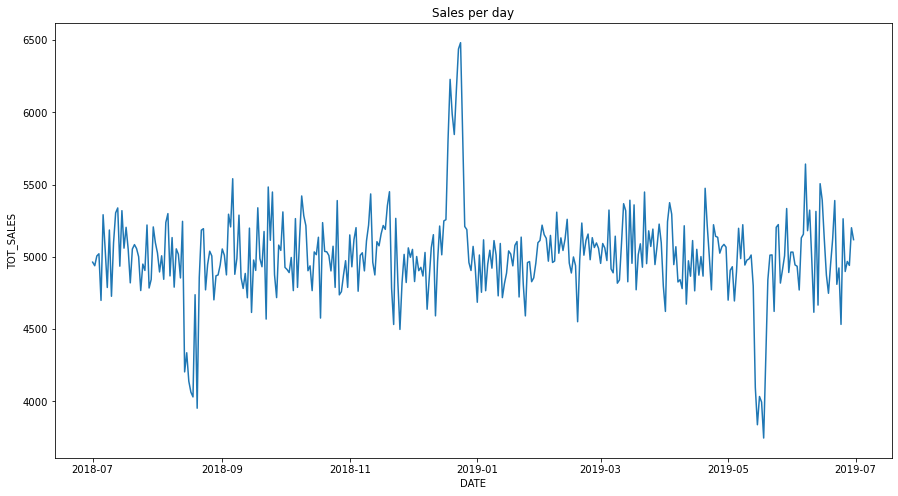

In [16]:
#Sales per day
plt.figure(figsize=(15,8))
sales_per_purchase_date = retail_df2.groupby('DATE', as_index=False).TOT_SALES.sum()
ax = sns.lineplot(x="DATE", y="TOT_SALES", data=sales_per_purchase_date)
ax.set_title('Sales per day')

In [17]:
#Average sales per day
sales_per_purchase_date = retail_df2.groupby('DATE', as_index=False).TOT_SALES.sum().sort_values(by ='TOT_SALES',ascending=False).reset_index().drop(columns='index',axis=1)
sales_per_purchase_date

,DATE,TOT_SALES
0,2018-12-24,6482.60
1,2018-12-23,6438.90
2,2018-12-19,6228.50
3,2018-12-22,6156.20
4,2018-12-20,5988.00
...,...,...
359,2018-08-18,4029.70
360,2019-05-17,3994.25
361,2018-08-20,3951.50
362,2019-05-15,3837.10


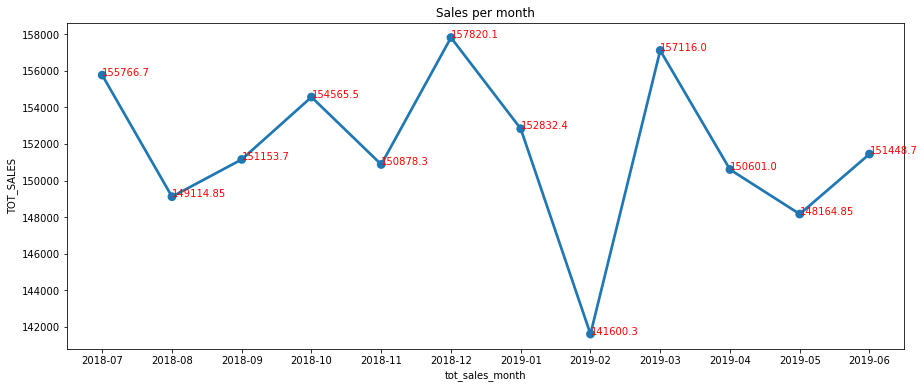

In [18]:
#sales per month
retail_df2['tot_sales_month'] = retail_df2.DATE.dt.to_period('M').astype(str)

# creating an aggregation
plt.figure(figsize=(15,6))
sales_per_purchase_month = retail_df2.groupby('tot_sales_month', as_index=False).TOT_SALES.sum().round(2)
ax = sns.pointplot(x="tot_sales_month", y="TOT_SALES", data=sales_per_purchase_month)
ax.set_title('Sales per month')
for i,j in sales_per_purchase_month.TOT_SALES.items():
    ax.annotate(str(j), xy=(i, j),color='red')

plt.show()

In [19]:
sales_per_purchase_month.sort_values(by ='TOT_SALES',ascending=False)


,tot_sales_month,TOT_SALES
5,2018-12,157820.10
8,2019-03,157116.00
0,2018-07,155766.70
3,2018-10,154565.50
6,2019-01,152832.40
11,2019-06,151448.70
2,2018-09,151153.70
4,2018-11,150878.30
9,2019-04,150601.00
1,2018-08,149114.85


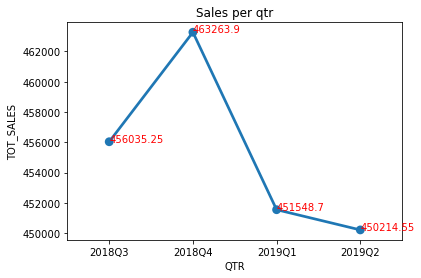

In [20]:
#sales per quarter
sales_per_purchase_qtr = retail_df2.groupby('QTR', as_index=False).TOT_SALES.sum().round(2)
ax = sns.pointplot(x="QTR", y="TOT_SALES", data=sales_per_purchase_qtr)
ax.set_title('Sales per qtr')
for i,j in sales_per_purchase_qtr.TOT_SALES.items():
    ax.annotate(str(j), xy=(i, j),color='red')

plt.show()

In [21]:
sales_per_purchase_qtr.sort_values(by ='TOT_SALES',ascending=False)

,QTR,TOT_SALES
1,2018Q4,463263.90
0,2018Q3,456035.25
2,2019Q1,451548.70
3,2019Q2,450214.55


In [22]:
#Lets's sort the dataframe by sales in each store
sales_per_store = retail_df2.groupby('STORE_NBR', as_index=False).TOT_SALES.sum()
sales_per_store = sales_per_store.sort_values(by ='TOT_SALES',ascending=False)
sales_per_store

,STORE_NBR,TOT_SALES
224,226,17844.65
87,88,15445.85
164,165,15188.35
235,237,14830.60
39,40,14427.30
...,...,...
91,92,9.20
205,206,7.60
250,252,7.40
10,11,6.70


<Figure size 720x576 with 0 Axes>

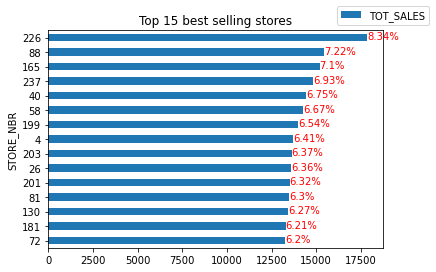

In [23]:
#Top 15 best selling stores
plt.figure(figsize=(10,8))
ax = sales_per_store.iloc[:15].plot.barh(x='STORE_NBR', y='TOT_SALES')
ax.set_title('Top 15 best selling stores')

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=10,
color='red')
plt.legend(bbox_to_anchor=(1, 1), loc=8)
# invert for largest on top 
ax.invert_yaxis()

In [24]:
retail_df2['PROD_NAME'].unique()

array(['Smiths Crinkle      Original 330g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Infuzions BBQ Rib   Prawn Crackers 110g',
       'French Fries Potato Chips 175g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Honey Soy    Chicken 175g',
       'Infuzions Thai SweetChili PotatoMix 110g',
       'Pringles Sthrn FriedChicken 134g',
       'Kettle Mozzarella   Basil & Pesto 175g',
       'WW Crinkle Cut      Original 175g', 'Burger Rings 220g',
       'WW Sour Cream &OnionStacked Chips 160g',
       'Smiths Thinly       Swt Chli&S/Cream175G',
       'Kettle Tortilla ChpsFeta&Garlic 150g', 'RRD Pc Sea Salt     165g',
       'RRD Sweet Chilli &  Sour Cream 165g',
       'Smith Crinkle Cut   Mac N Cheese 150g',
       'WW Original Corn    Chips 200g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Thins Potato Chips  Hot & Spicy 175g',
       'Smiths Crnkle Chip  Orgnl Big Bag 380g',
       'Ket

In [25]:
#Let's find out the top 15 highest selling products
sales_per_prod = retail_df2.groupby('PROD_NAME', as_index=False).TOT_SALES.sum()
sales_per_prod = sales_per_prod.sort_values(by ='TOT_SALES',ascending=False)
sales_per_prod

,PROD_NAME,TOT_SALES
11,Dorito Corn Chp Supreme 380g,40352.0
81,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
72,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2
31,Kettle Mozzarella Basil & Pesto 175g,34457.4
71,Smiths Crinkle Original 330g,34302.6
...,...,...
106,Woolworths Cheese Rings 190g,5169.6
84,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,5076.2
99,WW Crinkle Cut Chicken 175g,4702.2
85,Sunbites Whlegrn Crisps Frch/Onin 90g,4596.8


<Figure size 1080x1080 with 0 Axes>

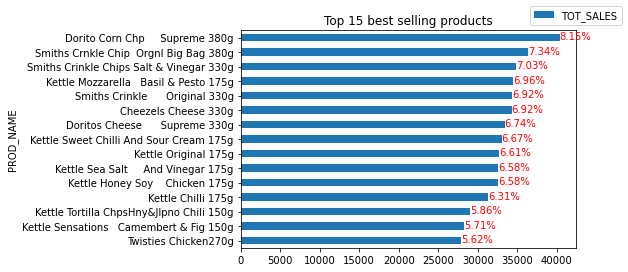

In [26]:
plt.figure(figsize=(15,15))
ax = sales_per_prod.iloc[:15].plot.barh(x='PROD_NAME', y='TOT_SALES')
ax.set_title('Top 15 best selling products')
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=10,
color='red')
plt.legend(bbox_to_anchor=(1, 1), loc=8)
# invert for largest on top 
ax.invert_yaxis()

In [27]:
#Now lets determine sales by brand

In [28]:
# I will filter the PRD_NAME column with a list of strings I believe represent a particular brand to create the BRAND column
strings = ['Smith','Dorito','Burger','Infuzions','Kettle','Sunbites','Red Rock Deli',
            'Natural Chip','Pringles','RRD','Thins','Woolworths','Cheetos',
            'Tyrrells','Cobs','Tostitos','Grain Waves','Snbts','NCC',
           'Twisties','CCs','Cheezels','WW','Infzns','GrnWves','French Fries']

In [29]:
def brand_name(x):
    strings = ['Smith','Dorito','Burger','Infuzions','Kettle','Sunbites','Red Rock Deli',
                                    'Natural Chip','Pringles','RRD','Thins','Woolworths','Cheetos',
                                     'Tyrrells','Cobs','Tostitos','Grain Waves','Snbts','NCC','Twisties','CCs','Cheezels','WW','Infzns','GrnWves','French Fries']
    for item in strings:
        if x.find(item) >=0:
            return item
        
retail_df2['BRAND']=retail_df2['PROD_NAME'].apply(brand_name)
retail_df2

,DATE,QTR,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,tot_sales_month,BRAND
256685,2018-07-01,2018Q3,245,245339,247845,7,Smiths Crinkle Original 330g,2,11.4,2018-07,Smith
235990,2018-07-01,2018Q3,222,222040,221737,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018-07,Dorito
34341,2018-07-01,2018Q3,25,25040,21704,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6,2018-07,Infuzions
62583,2018-07-01,2018Q3,128,128215,132006,29,French Fries Potato Chips 175g,2,6.0,2018-07,French Fries
116435,2018-07-01,2018Q3,256,256330,255496,52,Grain Waves Sour Cream&Chives 210G,1,3.6,2018-07,Grain Waves
...,...,...,...,...,...,...,...,...,...,...,...
111308,2019-06-30,2019Q2,172,172209,174057,2,Cobs Popd Sour Crm &Chives Chips 110g,2,7.6,2019-06,Cobs
31603,2019-06-30,2019Q2,199,199320,198993,24,Grain Waves Sweet Chilli 210g,2,7.2,2019-06,Grain Waves
245890,2019-06-30,2019Q2,95,95300,95463,23,Cheezels Cheese 330g,2,11.4,2019-06,Cheezels
245590,2019-06-30,2019Q2,91,91076,89519,40,Thins Chips Seasonedchicken 175g,2,6.6,2019-06,Thins


In [30]:
retail_df2['BRAND'].unique()

array(['Smith', 'Dorito', 'Infuzions', 'French Fries', 'Grain Waves',
       'Kettle', 'Pringles', 'WW', 'Burger', 'RRD', 'Thins', 'Tyrrells',
       'Twisties', 'Cheezels', 'Tostitos', 'Red Rock Deli', 'GrnWves',
       'Cobs', 'CCs', 'Infzns', 'Cheetos', 'Natural Chip', 'Woolworths',
       'NCC', 'Sunbites', 'Snbts'], dtype=object)

In [31]:
#Some brand have been repeated since they had short strings like WW and GrnWvs. We'll replace these with the one or either

retail_df2['BRAND'] = retail_df2['BRAND'].replace(['WW'],['Woolworths'])
retail_df2['BRAND'] = retail_df2['BRAND'].replace(['RRD'],['Red Rock Deli'])
retail_df2['BRAND'] = retail_df2['BRAND'].replace(['Infzns'],['Infuzions'])
retail_df2['BRAND'] = retail_df2['BRAND'].replace(['GrnWves'],['Grain Waves'])
retail_df2['BRAND'] = retail_df2['BRAND'].replace(['Snbts'],['Sunbites'])
retail_df2['BRAND'] = retail_df2['BRAND'].replace(['NCC'],['Natural Chip'])
retail_df2

,DATE,QTR,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,tot_sales_month,BRAND
256685,2018-07-01,2018Q3,245,245339,247845,7,Smiths Crinkle Original 330g,2,11.4,2018-07,Smith
235990,2018-07-01,2018Q3,222,222040,221737,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018-07,Dorito
34341,2018-07-01,2018Q3,25,25040,21704,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6,2018-07,Infuzions
62583,2018-07-01,2018Q3,128,128215,132006,29,French Fries Potato Chips 175g,2,6.0,2018-07,French Fries
116435,2018-07-01,2018Q3,256,256330,255496,52,Grain Waves Sour Cream&Chives 210G,1,3.6,2018-07,Grain Waves
...,...,...,...,...,...,...,...,...,...,...,...
111308,2019-06-30,2019Q2,172,172209,174057,2,Cobs Popd Sour Crm &Chives Chips 110g,2,7.6,2019-06,Cobs
31603,2019-06-30,2019Q2,199,199320,198993,24,Grain Waves Sweet Chilli 210g,2,7.2,2019-06,Grain Waves
245890,2019-06-30,2019Q2,95,95300,95463,23,Cheezels Cheese 330g,2,11.4,2019-06,Cheezels
245590,2019-06-30,2019Q2,91,91076,89519,40,Thins Chips Seasonedchicken 175g,2,6.6,2019-06,Thins


In [32]:
retail_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249666 entries, 256685 to 209226
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   DATE             249666 non-null  datetime64[ns]
 1   QTR              249666 non-null  period[Q-DEC] 
 2   STORE_NBR        249666 non-null  int64         
 3   LYLTY_CARD_NBR   249666 non-null  int64         
 4   TXN_ID           249666 non-null  int64         
 5   PROD_NBR         249666 non-null  int64         
 6   PROD_NAME        249666 non-null  object        
 7   PROD_QTY         249666 non-null  int64         
 8   TOT_SALES        249666 non-null  float64       
 9   tot_sales_month  249666 non-null  object        
 10  BRAND            249666 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3), period[Q-DEC](1)
memory usage: 22.9+ MB


In [33]:
retail_df2['BRAND'].unique()

array(['Smith', 'Dorito', 'Infuzions', 'French Fries', 'Grain Waves',
       'Kettle', 'Pringles', 'Woolworths', 'Burger', 'Red Rock Deli',
       'Thins', 'Tyrrells', 'Twisties', 'Cheezels', 'Tostitos', 'Cobs',
       'CCs', 'Cheetos', 'Natural Chip', 'Sunbites'], dtype=object)

In [34]:
#Now let's determine sales by Brand
sales_per_brand = retail_df2.groupby('BRAND', as_index=False).TOT_SALES.sum()
sales_per_brand = sales_per_brand.sort_values(by ='TOT_SALES',ascending=False)
sales_per_brand                  

,BRAND,TOT_SALES
9,Kettle,390239.8
5,Dorito,227629.9
13,Smith,224648.2
11,Pringles,177655.5
8,Infuzions,99047.6
12,Red Rock Deli,95046.0
15,Thins,88845.9
16,Tostitos,79789.6
4,Cobs,70569.8
17,Twisties,55425.4


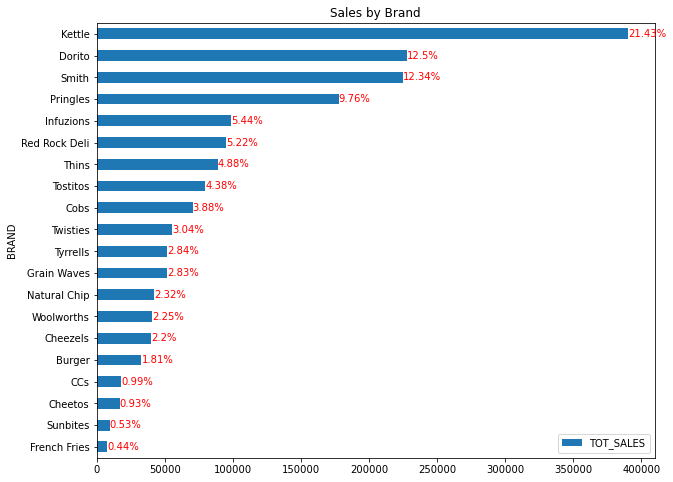

In [35]:

ax = sales_per_brand.plot.barh(x='BRAND', y='TOT_SALES',figsize=(10,8))
ax.set_title('Sales by Brand')

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=10,
color='red')
ax.set_title('Sales by Brand')
# invert for largest on top 
ax.invert_yaxis()

In [36]:
customers = pd.read_csv(r"E:\My Python codes\QVI_purchase_behaviour.csv")
customers

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [37]:
retail_df3 = pd.merge(retail_df2, customers, how='outer')
retail_df3

,DATE,QTR,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,tot_sales_month,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,2018Q3,245.0,245339,247845.0,7.0,Smiths Crinkle Original 330g,2.0,11.4,2018-07,Smith,YOUNG SINGLES/COUPLES,Mainstream
1,2018-07-01,2018Q3,222.0,222040,221737.0,42.0,Doritos Corn Chip Mexican Jalapeno 150g,2.0,7.8,2018-07,Dorito,YOUNG SINGLES/COUPLES,Budget
2,2018-07-01,2018Q3,25.0,25040,21704.0,87.0,Infuzions BBQ Rib Prawn Crackers 110g,2.0,7.6,2018-07,Infuzions,OLDER FAMILIES,Budget
3,2018-07-01,2018Q3,128.0,128215,132006.0,29.0,French Fries Potato Chips 175g,2.0,6.0,2018-07,French Fries,OLDER FAMILIES,Mainstream
4,2018-07-19,2018Q3,128.0,128215,132007.0,26.0,Pringles Sweet&Spcy BBQ 134g,2.0,7.4,2018-07,Pringles,OLDER FAMILIES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250780,NaT,NaT,NaN,272164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YOUNG FAMILIES,Mainstream
250781,NaT,NaT,NaN,272276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YOUNG FAMILIES,Budget
250782,NaT,NaT,NaN,272295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RETIREES,Mainstream
250783,NaT,NaT,NaN,272321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OLDER SINGLES/COUPLES,Premium


In [38]:
retail_df3.info()
#Looks like there are customers who didn't make any purchases, we'll go ahead and drop these rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250785 entries, 0 to 250784
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              249666 non-null  datetime64[ns]
 1   QTR               249666 non-null  period[Q-DEC] 
 2   STORE_NBR         249666 non-null  float64       
 3   LYLTY_CARD_NBR    250785 non-null  int64         
 4   TXN_ID            249666 non-null  float64       
 5   PROD_NBR          249666 non-null  float64       
 6   PROD_NAME         249666 non-null  object        
 7   PROD_QTY          249666 non-null  float64       
 8   TOT_SALES         249666 non-null  float64       
 9   tot_sales_month   249666 non-null  object        
 10  BRAND             249666 non-null  object        
 11  LIFESTAGE         250785 non-null  object        
 12  PREMIUM_CUSTOMER  250785 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(5), peri

In [39]:
retail_df3.dropna(axis=0, how='any',inplace=True)

We will try to find out the following
- Who spends the most on chips (total sales), describing customers by lifestage and
how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment

In [40]:
retail_df3

,DATE,QTR,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,tot_sales_month,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,2018Q3,245.0,245339,247845.0,7.0,Smiths Crinkle Original 330g,2.0,11.4,2018-07,Smith,YOUNG SINGLES/COUPLES,Mainstream
1,2018-07-01,2018Q3,222.0,222040,221737.0,42.0,Doritos Corn Chip Mexican Jalapeno 150g,2.0,7.8,2018-07,Dorito,YOUNG SINGLES/COUPLES,Budget
2,2018-07-01,2018Q3,25.0,25040,21704.0,87.0,Infuzions BBQ Rib Prawn Crackers 110g,2.0,7.6,2018-07,Infuzions,OLDER FAMILIES,Budget
3,2018-07-01,2018Q3,128.0,128215,132006.0,29.0,French Fries Potato Chips 175g,2.0,6.0,2018-07,French Fries,OLDER FAMILIES,Mainstream
4,2018-07-19,2018Q3,128.0,128215,132007.0,26.0,Pringles Sweet&Spcy BBQ 134g,2.0,7.4,2018-07,Pringles,OLDER FAMILIES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249661,2019-06-30,2019Q2,256.0,256274,255436.0,106.0,Natural ChipCo Hony Soy Chckn175g,2.0,6.0,2019-06,Natural Chip,OLDER SINGLES/COUPLES,Premium
249662,2019-06-30,2019Q2,255.0,255079,254624.0,113.0,Twisties Chicken270g,1.0,4.6,2019-06,Twisties,OLDER SINGLES/COUPLES,Premium
249663,2019-06-30,2019Q2,214.0,214164,213762.0,71.0,Twisties Cheese Burger 250g,1.0,4.3,2019-06,Burger,RETIREES,Budget
249664,2019-06-30,2019Q2,6.0,6358,6145.0,87.0,Infuzions BBQ Rib Prawn Crackers 110g,1.0,3.8,2019-06,Infuzions,YOUNG SINGLES/COUPLES,Premium


In [41]:
#Let's see sales by customer lifestage
sales_by_lifestage = retail_df3.groupby('LIFESTAGE', as_index=False).TOT_SALES.sum()
sales_by_lifestage = sales_by_lifestage.sort_values(by ='TOT_SALES',ascending=False)
sales_by_lifestage

,LIFESTAGE,TOT_SALES
3,OLDER SINGLES/COUPLES,378871.95
4,RETIREES,344886.90
2,OLDER FAMILIES,332943.80
5,YOUNG FAMILIES,297386.00
6,YOUNG SINGLES/COUPLES,245307.50
0,MIDAGE SINGLES/COUPLES,174010.50
1,NEW FAMILIES,47655.75


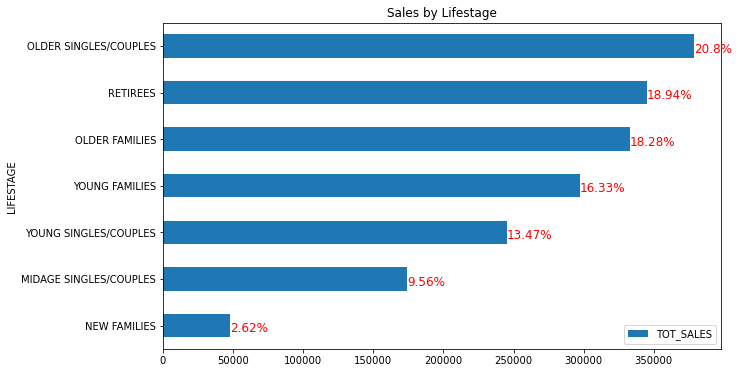

In [42]:
ax1 = sales_by_lifestage.plot.barh(x='LIFESTAGE', y='TOT_SALES',figsize=(10,6))
#Older single/Couples spend most on chips

totals = []

# find the values and append to list
for i in ax1.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax1.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax1.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=12,
color='red')
ax1.set_title('Sales by Lifestage')
# invert for largest on top 
ax1.invert_yaxis()

In [43]:
retail_df3['PREMIUM_CUSTOMER'].unique()

array(['Mainstream', 'Budget', 'Premium'], dtype=object)

In [44]:
sales_by_premium = retail_df3.groupby('PREMIUM_CUSTOMER', as_index=False).TOT_SALES.sum()
sales_by_premium = sales_by_premium.sort_values(by ='TOT_SALES',ascending=False)
sales_by_premium

,PREMIUM_CUSTOMER,TOT_SALES
1,Mainstream,706242.50
0,Budget,636632.85
2,Premium,478187.05


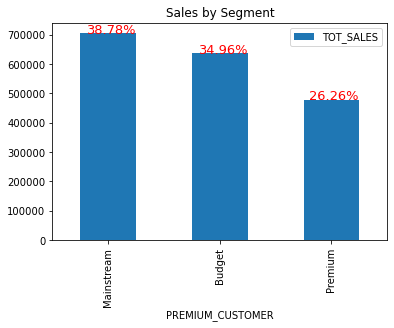

In [45]:
ax2 = sales_by_premium.plot.bar(x='PREMIUM_CUSTOMER', y='TOT_SALES')
ax2.set_title('Sales by Segment')
totals = []

# find the values and append to list
for i in ax2.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax2.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax2.text(i.get_x()+.05, i.get_height()-3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,
                color='red')

#Mainstream customers spend the most on chips

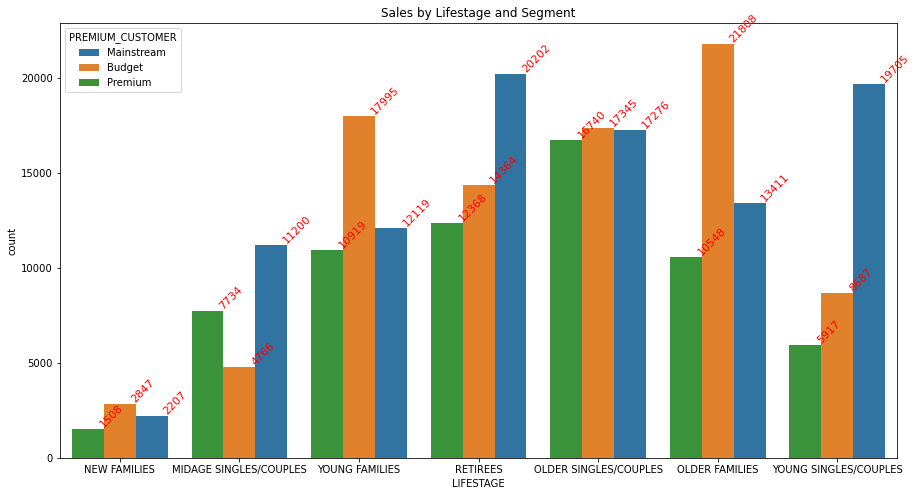

In [46]:
plt.figure(figsize=(15,8))
S = sns.countplot(x="LIFESTAGE", hue="PREMIUM_CUSTOMER", data=retail_df3)
S.set_title('Sales by Lifestage and Segment')

for i in S.patches:
    # get_x pulls left or right; get_height pushes up or down
    S.text(i.get_x()+.05, i.get_height()+100, \
            str(round((i.get_height()), 1)), fontsize=11, color='red',
                rotation=45)
S.invert_xaxis()

Average sales by Lifestage

In [47]:
avg_sale_per_lifestage = retail_df3.groupby('LIFESTAGE', as_index=False).agg({'TOT_SALES': ['count','mean']})
avg_sale_per_lifestage.columns = ['TOT_SALES', 'count', 'mean']

avg_sale_per_lifestage = avg_sale_per_lifestage.sort_values(by='mean', ascending=False)
avg_sale_per_lifestage

,TOT_SALES,count,mean
3,OLDER SINGLES/COUPLES,51361,7.376647
4,RETIREES,46934,7.348338
0,MIDAGE SINGLES/COUPLES,23700,7.342215
2,OLDER FAMILIES,45767,7.274757
1,NEW FAMILIES,6562,7.262382
5,YOUNG FAMILIES,41033,7.247484
6,YOUNG SINGLES/COUPLES,34309,7.149946


Average product Qty by lifestage

In [48]:
avg_qty_per_lifestage = retail_df3.groupby('LIFESTAGE', as_index=False).agg({'PROD_QTY': ['count','mean']})
avg_qty_per_lifestage.columns = ['PROD_QTY', 'count', 'mean']

avg_qty_per_lifestage = avg_qty_per_lifestage.sort_values(by='mean', ascending=False)
avg_qty_per_lifestage

,PROD_QTY,count,mean
2,OLDER FAMILIES,45767,1.955011
5,YOUNG FAMILIES,41033,1.940341
3,OLDER SINGLES/COUPLES,51361,1.913164
0,MIDAGE SINGLES/COUPLES,23700,1.901181
4,RETIREES,46934,1.892423
1,NEW FAMILIES,6562,1.857056
6,YOUNG SINGLES/COUPLES,34309,1.832901


Let's do RFM Analysis by each customer

In [49]:

import warnings
warnings.filterwarnings('ignore')
from datetime import timedelta


In [50]:
temp=['LYLTY_CARD_NBR', 'TXN_ID', 'DATE', 'TOT_SALES']
RFM_data=retail_df3[temp]
RFM_data.shape

(249666, 4)

In [51]:
RFM_data.head()

,LYLTY_CARD_NBR,TXN_ID,DATE,TOT_SALES
0,245339,247845.0,2018-07-01,11.4
1,222040,221737.0,2018-07-01,7.8
2,25040,21704.0,2018-07-01,7.6
3,128215,132006.0,2018-07-01,6.0
4,128215,132007.0,2018-07-19,7.4


In [52]:
RFM_table=RFM_data.groupby('LYLTY_CARD_NBR')


In [53]:
#create an instance from the most recent date of purchase
now_date = retail_df3['DATE'].max() + timedelta(days=1)
now_date

Timestamp('2019-07-01 00:00:00')

In [54]:
RFM_table = RFM_data.groupby(['LYLTY_CARD_NBR']).agg({'DATE': lambda x: (now_date - x.max()).days,
                                                 'TXN_ID': lambda x: len(x.unique()),
                                                 'TOT_SALES': lambda x: x.sum()})
RFM_table['DATE'] = RFM_table['DATE'].astype(int)
RFM_table.rename(columns={'DATE': 'recency', 
                         'TXN_ID': 'frequency',
                         'TOT_SALES': 'monetary_value'}, inplace=True)

#Let's sort by frequency to see which customers make the most visits
RFM_table1 = RFM_table.sort_values(by=['frequency'],ascending=False)
RFM_table1.head(20)

,recency,frequency,monetary_value
LYLTY_CARD_NBR,,,
162039,10,18.0,126.8
230078,11,17.0,138.6
105026,14,16.0,114.2
179228,3,16.0,120.8
113080,11,15.0,107.8
156240,20,15.0,86.2
207003,13,15.0,107.2
213140,1,15.0,108.2
116181,4,15.0,112.4


Text(0.5, 1.0, 'Number of Transactions per customer')

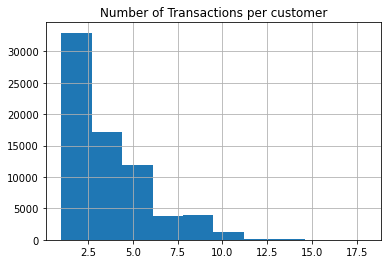

In [55]:
#Let's plot a distribution of the three characteristics in a histogram
f = RFM_table1['frequency'].hist(bins=10)
f.set_title('Number of Transactions per customer')


A right skewed distribution shows most customers have only made upto 2 transactions

Text(0.5, 1.0, 'Recency distribution')

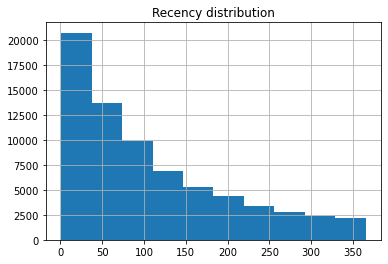

In [56]:
r = RFM_table1['recency'].hist(bins=10)
r.set_title('Recency distribution')

Most customers made their most recent purchase less than 50 days from the last day of record

Text(0.5, 1.0, 'Monetary value distribution')

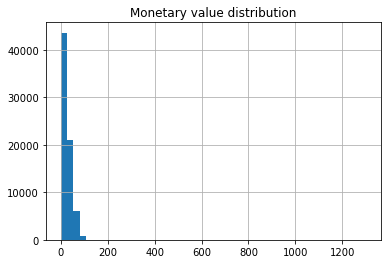

In [75]:
m = RFM_table1['monetary_value'].hist(bins=50)
m.set_title('Monetary value distribution')

In [58]:
RFM_table1.describe()

,recency,frequency,monetary_value
count,71518.000000,71518.000000,71518.000000
mean,107.615272,3.469868,25.462994
std,93.847170,2.468909,19.834223
min,1.000000,1.000000,1.700000
25%,31.000000,1.000000,8.800000
50%,78.000000,3.000000,20.600000
75%,163.000000,5.000000,37.900000
max,365.000000,18.000000,1300.000000


In [59]:
RFM_table1.loc[(RFM_table1['monetary_value']>=200)]

,recency,frequency,monetary_value
LYLTY_CARD_NBR,,,
226000,42,2.0,1300.0


In [60]:
# Filter out non repeat customers
rfm = RFM_table1[RFM_table1['frequency']>0]

# Filter out monetary outliers
rfm = RFM_table1[RFM_table1['monetary_value']<200]
rfm

,recency,frequency,monetary_value
LYLTY_CARD_NBR,,,
162039,10,18.0,126.8
230078,11,17.0,138.6
105026,14,16.0,114.2
179228,3,16.0,120.8
113080,11,15.0,107.8
...,...,...,...
142216,256,1.0,7.2
142213,105,1.0,7.8
142210,135,1.0,11.4


In [61]:
# Create the quartiles scores
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
    
def RFMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
rfm['R'] = rfm['recency'].apply(RFMScore, args=('recency',quantiles,))
rfm['F'] = rfm['frequency'].apply(RFMScore, args=('frequency',quantiles,))
rfm['M'] = rfm['monetary_value'].apply(RFMScore, args=('monetary_value',quantiles,))
rfm

,recency,frequency,monetary_value,R,F,M
LYLTY_CARD_NBR,,,,,,
162039,10,18.0,126.8,1,4,4
230078,11,17.0,138.6,1,4,4
105026,14,16.0,114.2,1,4,4
179228,3,16.0,120.8,1,4,4
113080,11,15.0,107.8,1,4,4
...,...,...,...,...,...,...
142216,256,1.0,7.2,4,1,1
142213,105,1.0,7.8,3,1,1
142210,135,1.0,11.4,3,1,2


In [62]:
# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
rfm

,recency,frequency,monetary_value,R,F,M,RFM_Score
LYLTY_CARD_NBR,,,,,,,
162039,10,18.0,126.8,1,4,4,9
230078,11,17.0,138.6,1,4,4,9
105026,14,16.0,114.2,1,4,4,9
179228,3,16.0,120.8,1,4,4,9
113080,11,15.0,107.8,1,4,4,9
...,...,...,...,...,...,...,...
142216,256,1.0,7.2,4,1,1,6
142213,105,1.0,7.8,3,1,1,5
142210,135,1.0,11.4,3,1,2,6


In [63]:
rfm['RFM_Score'].nunique()

10

In [64]:
rfm1= rfm.sort_values(by=['RFM_Score'], ascending=False)
rfm1

,recency,frequency,monetary_value,R,F,M,RFM_Score
LYLTY_CARD_NBR,,,,,,,
100114,167,7.0,50.0,4,4,4,12
257035,233,6.0,44.2,4,4,4,12
144182,222,6.0,39.8,4,4,4,12
105156,186,6.0,48.0,4,4,4,12
172108,164,6.0,46.8,4,4,4,12
...,...,...,...,...,...,...,...
9487,20,1.0,6.2,1,1,1,3
268462,29,1.0,2.9,1,1,1,3
25164,26,1.0,7.4,1,1,1,3


In [65]:
#group into different categories
def get_class(df):
    if df['RFM_Score'] >= 9:
        return 'Gold'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return 'Silver'
    else:
        return 'Bronze'
    
rfm1['class'] = rfm1.apply(get_class, axis=1)
rfm1[['recency','frequency','monetary_value','R', 'F', 'M', 'RFM_Score', 'class']]

,recency,frequency,monetary_value,R,F,M,RFM_Score,class
LYLTY_CARD_NBR,,,,,,,,
100114,167,7.0,50.0,4,4,4,12,Gold
257035,233,6.0,44.2,4,4,4,12,Gold
144182,222,6.0,39.8,4,4,4,12,Gold
105156,186,6.0,48.0,4,4,4,12,Gold
172108,164,6.0,46.8,4,4,4,12,Gold
...,...,...,...,...,...,...,...,...
9487,20,1.0,6.2,1,1,1,3,Bronze
268462,29,1.0,2.9,1,1,1,3,Bronze
25164,26,1.0,7.4,1,1,1,3,Bronze


In [66]:
rfm1['class'].value_counts()

Silver    45530
Gold      21786
Bronze     4201
Name: class, dtype: int64

In [67]:
class_stats = rfm1[['class','recency','frequency','monetary_value']].groupby('class').agg(['mean','count'])
class_stats

recency        frequency        monetary_value       
              mean  count      mean  count           mean  count
class                                                           
Bronze   35.071412   4201  1.092597   4201       5.956963   4201
Gold     75.447260  21786  6.351235  21786      47.962999  21786
Silver  129.702570  45530  2.310521  45530      16.468599  45530

In [68]:
#INFERENCES FROM RFM ANALYSIS AND RECOMMENDATIONS

1.Gold customers have the highest frequency and highest monetary value
2.Bronze customers have the lowest recency, frequency and monetary value. The do not buy often and the bsuiness should focus on retaining them 
3.Potential loyal customers(silver customers) have stopped buying chips apfter some time. Business should find out why they stop buying after some time and reactivate them. 